In [26]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

%matplotlib inline

In [5]:
xl = pd.ExcelFile("C:/computer_harddrive/From CHINA/bio_1506030731176600/BIGELOW/BALCH/GREAT_BELT/archive/bigelow.xlsx")
df = xl.parse("data")
df = df.replace(-999.0, 0)
df.head()

,date,time,lat,lon,Wt,sal,chl,bbp532,es412,es443,...,Lw555,Lw670,Lwn412,Lwn443,Lwn490,Lwn510,Lwn531,Lwn555,Lwn670,relaz
0,20120219,13:08:06,-33.1384,34.7234,24.6421,35.4841,0.088893,0.000000,46.197529,47.556128,...,0.067295,0.008123,2.052167,1.936976,1.266318,0.612593,0.378169,0.322224,0.047795,-120.563462
1,20120219,13:30:17,-33.1919,34.7835,24.6013,35.4872,0.088874,0.001061,52.082797,55.268737,...,0.105428,0.033989,2.082218,1.979999,1.409974,0.740178,0.532536,0.429556,0.142442,-120.489363
2,20120219,13:37:37,-33.2096,34.8036,24.5905,35.4842,0.096595,0.001119,33.161929,33.071838,...,0.000000,0.000000,1.621302,1.268990,0.566434,0.000000,0.000000,0.000000,0.000000,-118.366118
3,20120219,13:47:34,-33.2338,34.8308,24.6444,35.4885,0.117948,0.001274,35.460282,36.847264,...,0.069324,0.019768,2.054478,1.917529,1.330987,0.710526,0.495105,0.399291,0.113828,-119.198974
4,20120219,13:55:20,-33.2525,34.8518,24.6916,35.4839,0.096582,0.018306,51.040004,55.762404,...,0.130576,0.043974,2.142444,2.024407,1.444294,0.776746,0.571947,0.453740,0.146746,-117.627445


In [91]:
df['Rrs443']=df['Lwn443']/189.652
df['Rrs490']=df['Lwn490']/200.396
df['Rrs555']=df['Lwn555']/182.079

a0 = 0.2228
a1 = -2.4683
a2 = 1.5867
a3 = -0.4275
a4 = -0.7768
x_top = df[['Rrs443', 'Rrs490']].max(axis='columns')
x = x_top/df['Rrs555'].replace(0, np.nan)
x = np.log10(x)
c = a0+a1*x+a2*x**2+a3*x**3+a4*x**4
df['Chl_est_VIIRS']=10**c

In [114]:
sns.set_style("ticks")
y = np.log10(df['chl'])
idx = np.isfinite(x) & np.isfinite(y) 
z = np.polyfit(x[idx], y[idx], 4)
p = np.poly1d(np.polyfit(x[idx], y[idx], 4))
z

array([-0.92183237,  3.45754773, -3.42135204,  0.45773023, -0.53563488])

(0, 1)

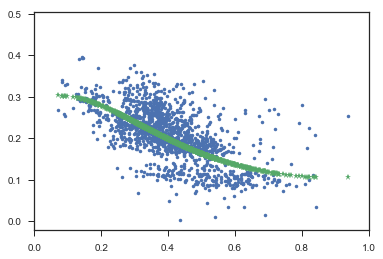

In [116]:
plt.plot(x[idx],10**y[idx],'.',x[idx],10**p(x[idx]),'*')
plt.xlim(0,1)
plt.ylim(0,0.5)

(0, 0.5)

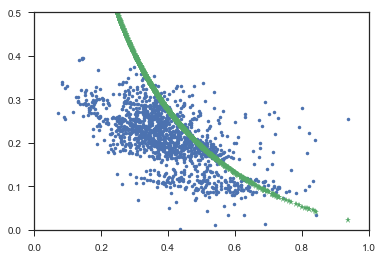

In [118]:
sns.set_style("ticks")
plt.plot(x[idx],10**y[idx],'.',x[idx],df['Chl_est_VIIRS'][idx],'*')
plt.xlim(0,1)
plt.ylim(0,0.5)